In [ ]:
#importing the necessary libraries and frameworks
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from datetime import datetime

# Circuits Data Preprocessing

In [ ]:
circuits = pd.read_csv('circuits.csv')
circuits.columns
circuits.head(4)

circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...

In [ ]:
circuit_rename_col_names = {'name':'circuitName','location':'circuitLocation','country':'circuitCountry'}
circuit_drop_col_names = ['lat','lng','alt','url']
circuits.rename(columns=circuit_rename_col_names,inplace=True)
circuits = circuits.drop(circuit_drop_col_names,axis = 1)
circuits.columns
circuits.head(4)

circuitId   circuitRef                     circuitName circuitLocation  \
0          1  albert_park  Albert Park Grand Prix Circuit       Melbourne   
1          2       sepang    Sepang International Circuit    Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit          Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya        Montmeló   

  circuitCountry  
0      Australia  
1       Malaysia  
2        Bahrain  
3          Spain

# Laptimes Data Preprocessing

In [ ]:
laptimes = pd.read_csv('lap_times.csv')
laptimes.columns
laptimes.head(4)

raceId  driverId  lap  position      time  milliseconds
0     841        20    1         1  1:38.109         98109
1     841        20    2         1  1:33.006         93006
2     841        20    3         1  1:32.713         92713
3     841        20    4         1  1:32.803         92803

In [ ]:
laptimes_rename_col_names = {'lap':'driverRaceLapNumber','position':'driverRaceFinalPosition','time':'driverLapTime', 'milliseconds': 'driverLapTimeInMilliseconds'}
laptimes.rename(columns=laptimes_rename_col_names,inplace=True)
laptimes.columns
laptimes.head(4)

raceId  driverId  driverRaceLapNumber  driverRaceFinalPosition  \
0     841        20                    1                        1   
1     841        20                    2                        1   
2     841        20                    3                        1   
3     841        20                    4                        1   

  driverLapTime  driverLapTimeInMilliseconds  
0      1:38.109                        98109  
1      1:33.006                        93006  
2      1:32.713                        92713  
3      1:32.803                        92803

# Pitstops Data Preprocessing

In [ ]:
pitstops = pd.read_csv('pit_stops.csv')
pitstops.columns
pitstops.head(4)

raceId  driverId  stop  lap      time duration  milliseconds
0     841       153     1    1  17:05:23   26.898         26898
1     841        30     1    1  17:05:52   25.021         25021
2     841        17     1   11  17:20:48   23.426         23426
3     841         4     1   12  17:22:34   23.251         23251

In [ ]:
pitstops_rename_col_names = {'stop':'pitStopNumber','lap':'pitStopLap','duration':'pitStopDuration', 'milliseconds': 'pitStopDurationInMilliseconds'}
pitstops_drop_col_names = ['time']
pitstops.rename(columns=pitstops_rename_col_names,inplace=True)
pitstops = pitstops.drop(pitstops_drop_col_names, axis = 1)
pitstops.columns
pitstops.head(4)

raceId  driverId  pitStopNumber  pitStopLap pitStopDuration  \
0     841       153              1           1          26.898   
1     841        30              1           1          25.021   
2     841        17              1          11          23.426   
3     841         4              1          12          23.251   

   pitStopDurationInMilliseconds  
0                          26898  
1                          25021  
2                          23426  
3                          23251

# Status Data PreProcessing

In [ ]:
status = pd.read_csv('status.csv')
status.columns
status.head(4)

statusId        status
0         1      Finished
1         2  Disqualified
2         3      Accident
3         4     Collision

In [ ]:
status_rename_col_names = {'status':'driverRaceResultStatus'}
status.rename(columns=status_rename_col_names,inplace=True)
status.columns
status.head(4)

statusId driverRaceResultStatus
0         1               Finished
1         2           Disqualified
2         3               Accident
3         4              Collision

# Constructors Data Preprocessing

In [ ]:
constructors = pd.read_csv('constructors.csv')
constructors.columns
constructors.head(4)

constructorId constructorRef        name nationality  \
0              1        mclaren     McLaren     British   
1              2     bmw_sauber  BMW Sauber      German   
2              3       williams    Williams     British   
3              4        renault     Renault      French   

                                                 url  
0               http://en.wikipedia.org/wiki/McLaren  
1            http://en.wikipedia.org/wiki/BMW_Sauber  
2  http://en.wikipedia.org/wiki/Williams_Grand_Pr...  
3  http://en.wikipedia.org/wiki/Renault_in_Formul...

In [ ]:
constructor_rename_col_names = {'name':'constructorName','nationality':'constructorNationality'}
constructor_drop_col_names = ['url']
constructors.rename(columns=constructor_rename_col_names,inplace=True)
constructors = constructors.drop(constructor_drop_col_names,axis = 1)
constructors.columns
constructors.head(4)

constructorId constructorRef constructorName constructorNationality
0              1        mclaren         McLaren                British
1              2     bmw_sauber      BMW Sauber                 German
2              3       williams        Williams                British
3              4        renault         Renault                 French

# Constructor Results Data Preprocessing

In [ ]:
constructors_results = pd.read_csv('constructor_results.csv')
constructors_results.columns
constructors_results.head(4)

constructorResultsId  raceId  constructorId  points status
0                     1      18              1    14.0     \N
1                     2      18              2     8.0     \N
2                     3      18              3     9.0     \N
3                     4      18              4     5.0     \N

In [ ]:
constructor_results_rename_col_names = {'points':'constructorRacePoints'}
constructor_results_drop_col_names = ['status']
constructors_results.rename(columns=constructor_results_rename_col_names,inplace=True)
constructors_results = constructors_results.drop(constructor_results_drop_col_names,axis = 1)
constructors_results.columns
constructors_results.head(4)

constructorResultsId  raceId  constructorId  constructorRacePoints
0                     1      18              1                   14.0
1                     2      18              2                    8.0
2                     3      18              3                    9.0
3                     4      18              4                    5.0

# Constructor Standings Data Preprocessing

In [ ]:
constructors_standings = pd.read_csv('constructor_standings.csv')
constructors_standings.columns
constructors_standings.head(4)

constructorStandingsId  raceId  constructorId  points  position  \
0                       1      18              1    14.0         1   
1                       2      18              2     8.0         3   
2                       3      18              3     9.0         2   
3                       4      18              4     5.0         4   

  positionText  wins  
0            1     1  
1            3     0  
2            2     0  
3            4     0

In [ ]:
constructor_standings_rename_col_names = {'points':'constructorChampionshipStandingPoints', 'position':'constructorChampionshipStandingPosition', 'wins':'constructorChampionshipStandingWins'}
constructor_standings_drop_col_names = ['positionText']
constructors_standings.rename(columns=constructor_standings_rename_col_names,inplace=True)
constructors_standings = constructors_standings.drop(constructor_standings_drop_col_names,axis = 1)
constructors_standings.columns
constructors_standings.head(4)

constructorStandingsId  raceId  constructorId  \
0                       1      18              1   
1                       2      18              2   
2                       3      18              3   
3                       4      18              4   

   constructorChampionshipStandingPoints  \
0                                   14.0   
1                                    8.0   
2                                    9.0   
3                                    5.0   

   constructorChampionshipStandingPosition  \
0                                        1   
1                                        3   
2                                        2   
3                                        4   

   constructorChampionshipStandingWins  
0                                    1  
1                                    0  
2                                    0  
3                                    0

# Driver Data Preprocessing

In [ ]:
drivers = pd.read_csv('drivers.csv')
drivers.columns
drivers.head(4)

driverId driverRef number code  forename   surname         dob nationality  \
0         1  hamilton     44  HAM     Lewis  Hamilton  1985-01-07     British   
1         2  heidfeld     \N  HEI      Nick  Heidfeld  1977-05-10      German   
2         3   rosberg      6  ROS      Nico   Rosberg  1985-06-27      German   
3         4    alonso     14  ALO  Fernando    Alonso  1981-07-29     Spanish   

                                            url  
0   http://en.wikipedia.org/wiki/Lewis_Hamilton  
1    http://en.wikipedia.org/wiki/Nick_Heidfeld  
2     http://en.wikipedia.org/wiki/Nico_Rosberg  
3  http://en.wikipedia.org/wiki/Fernando_Alonso

In [ ]:
driver_rename_col_names = {'number':'driverNumber','forename':'driverForename', 'surname':'driverSurname', 'dob':'driverDateOfBirth', 'nationality': 'driverNationality'}
driver_drop_col_names = ['code','url']
drivers.rename(columns=driver_rename_col_names,inplace=True)
drivers = drivers.drop(driver_drop_col_names,axis = 1)
drivers.columns
drivers.head(4)

driverId driverRef driverNumber driverForename driverSurname  \
0         1  hamilton           44          Lewis      Hamilton   
1         2  heidfeld           \N           Nick      Heidfeld   
2         3   rosberg            6           Nico       Rosberg   
3         4    alonso           14       Fernando        Alonso   

  driverDateOfBirth driverNationality  
0        1985-01-07           British  
1        1977-05-10            German  
2        1985-06-27            German  
3        1981-07-29           Spanish


# Driver Standing Data Preprocessing

In [ ]:
drivers_standings = pd.read_csv('driver_standings.csv')
drivers_standings.columns
drivers_standings.head(4)

driverStandingsId  raceId  driverId  points  position positionText  wins
0                  1      18         1    10.0         1            1     1
1                  2      18         2     8.0         2            2     0
2                  3      18         3     6.0         3            3     0
3                  4      18         4     5.0         4            4     0

In [ ]:
driver_standings_rename_col_names = {'points':'driverChampionshipStandingPoints', 'position':'driverChampionshipStandingPosition', 'wins':'driverChampionshipStandingWins'}
driver_standings_drop_col_names = ['positionText']
drivers_standings.rename(columns=driver_standings_rename_col_names,inplace=True)
drivers_standings = drivers_standings.drop(driver_standings_drop_col_names,axis = 1)
drivers_standings.columns
drivers_standings.head(4)

driverStandingsId  raceId  driverId  driverChampionshipStandingPoints  \
0                  1      18         1                              10.0   
1                  2      18         2                               8.0   
2                  3      18         3                               6.0   
3                  4      18         4                               5.0   

   driverChampionshipStandingPosition  driverChampionshipStandingWins  
0                                   1                               1  
1                                   2                               0  
2                                   3                               0  
3                                   4                               0

# Races Data Pre Processing

In [ ]:
races = pd.read_csv('races.csv')
races.columns
races.head(4)

raceId  year  round  circuitId                   name        date  \
0       1  2009      1          1  Australian Grand Prix  2009-03-29   
1       2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2       3  2009      3         17     Chinese Grand Prix  2009-04-19   
3       4  2009      4          3     Bahrain Grand Prix  2009-04-26   

       time                                                url fp1_date  \
0  06:00:00  http://en.wikipedia.org/wiki/2009_Australian_G...       \N   
1  09:00:00  http://en.wikipedia.org/wiki/2009_Malaysian_Gr...       \N   
2  07:00:00  http://en.wikipedia.org/wiki/2009_Chinese_Gran...       \N   
3  12:00:00  http://en.wikipedia.org/wiki/2009_Bahrain_Gran...       \N   

  fp1_time fp2_date fp2_time fp3_date fp3_time quali_date quali_time  \
0       \N       \N       \N       \N       \N         \N         \N   
1       \N       \N       \N       \N       \N         \N         \N   
2       \N       \N       \N       \N       \N         \N         \N   
3       \N       \N       \N       \N       \N         \N         \N   

  sprint_date sprint_time  
0          \N          \N  
1          \N          \N  
2          \N          \N  
3          \N          \N

In [ ]:
races_rename_col_names = {'year':'season','round':'raceNumber','name':'prixName', 'date':'raceDate'}
races_drop_col_names = ['time','url','fp1_date','fp1_time', 'fp2_date','fp2_time', 'fp3_date','fp3_time', 'quali_date', 'quali_time', 'sprint_date','sprint_time']
races.rename(columns=races_rename_col_names,inplace=True)
races = races.drop(races_drop_col_names,axis = 1)
races.columns
races.head(4)

raceId  season  raceNumber  circuitId               prixName    raceDate
0       1    2009           1          1  Australian Grand Prix  2009-03-29
1       2    2009           2          2   Malaysian Grand Prix  2009-04-05
2       3    2009           3         17     Chinese Grand Prix  2009-04-19
3       4    2009           4          3     Bahrain Grand Prix  2009-04-26

# Race Results Data PreProcessing





In [ ]:
results = pd.read_csv('results.csv')
results.columns
results.head(4)

resultId  raceId  driverId  constructorId number  grid position  \
0         1      18         1              1     22     1        1   
1         2      18         2              2      3     5        2   
2         3      18         3              3      7     7        3   
3         4      18         4              4      5    11        4   

  positionText  positionOrder  points  laps         time milliseconds  \
0            1              1    10.0    58  1:34:50.616      5690616   
1            2              2     8.0    58       +5.478      5696094   
2            3              3     6.0    58       +8.163      5698779   
3            4              4     5.0    58      +17.181      5707797   

  fastestLap rank fastestLapTime fastestLapSpeed  statusId  
0         39    2       1:27.452         218.300         1  
1         41    3       1:27.739         217.586         1  
2         41    5       1:28.090         216.719         1  
3         58    7       1:28.603         215.464         1

In [ ]:
results['fastestLapSpeed'].describe()

count     26759
unique     7725
top          \N
freq      18507
Name: fastestLapSpeed, dtype: object

In [ ]:
results_rename_col_names = {'number':'carNumber','grid':'driverStartGridPos','position':'driverFinalGridPos', 'positionOrder':'driverFinalRank', 'points' : 'driverRacePoints', 'laps': 'driverLapCount', 'fastestLap': 'driverFatestLapNumber','fastestLapTime': 'driverFastestLapTime', 'fastestLapSpeed': 'driverFastestLapSpeed'}
results_drop_col_names = ['time', 'positionText', 'milliseconds', 'rank']
results.rename(columns=results_rename_col_names,inplace=True)
results = results.drop(results_drop_col_names,axis = 1)
results.columns
results.head(4)

resultId  raceId  driverId  constructorId carNumber  driverStartGridPos  \
0         1      18         1              1        22                   1   
1         2      18         2              2         3                   5   
2         3      18         3              3         7                   7   
3         4      18         4              4         5                  11   

  driverFinalGridPos  driverFinalRank  driverRacePoints  driverLapCount  \
0                  1                1              10.0              58   
1                  2                2               8.0              58   
2                  3                3               6.0              58   
3                  4                4               5.0              58   

  driverFatestLapNumber driverFastestLapTime driverFastestLapSpeed  statusId  
0                    39             1:27.452               218.300         1  
1                    41             1:27.739               217.586         1  
2                    41             1:28.090               216.719         1  
3                    58             1:28.603               215.464         1

In [ ]:
races.shape

(1125, 6)

In [ ]:
races.columns

Index(['raceId', 'season', 'raceNumber', 'circuitId', 'prixName', 'raceDate'], dtype='object')

In [ ]:
results.shape

(26759, 14)

In [ ]:
results.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'carNumber',
       'driverStartGridPos', 'driverFinalGridPos', 'driverFinalRank',
       'driverRacePoints', 'driverLapCount', 'driverFatestLapNumber',
       'driverFastestLapTime', 'driverFastestLapSpeed', 'statusId'],
      dtype='object')

In [ ]:
race_results = pd.merge(races,results,how='inner',on=['raceId'])

In [ ]:
race_results.shape

(26759, 19)

In [ ]:
race_results.columns

Index(['raceId', 'season', 'raceNumber', 'circuitId', 'prixName', 'raceDate',
       'resultId', 'driverId', 'constructorId', 'carNumber',
       'driverStartGridPos', 'driverFinalGridPos', 'driverFinalRank',
       'driverRacePoints', 'driverLapCount', 'driverFatestLapNumber',
       'driverFastestLapTime', 'driverFastestLapSpeed', 'statusId'],
      dtype='object')

In [ ]:
race_results.head(5)

raceId  season  raceNumber  circuitId               prixName    raceDate  \
0       1    2009           1          1  Australian Grand Prix  2009-03-29   
1       1    2009           1          1  Australian Grand Prix  2009-03-29   
2       1    2009           1          1  Australian Grand Prix  2009-03-29   
3       1    2009           1          1  Australian Grand Prix  2009-03-29   
4       1    2009           1          1  Australian Grand Prix  2009-03-29   

   resultId  driverId  constructorId carNumber  driverStartGridPos  \
0      7554        18             23        22                   1   
1      7555        22             23        23                   2   
2      7556        15              7         9                  20   
3      7557        10              7        10                  19   
4      7558         4              4         7                  10   

  driverFinalGridPos  driverFinalRank  driverRacePoints  driverLapCount  \
0                  1                1              10.0              58   
1                  2                2               8.0              58   
2                  3                3               6.0              58   
3                  4                4               5.0              58   
4                  5                5               4.0              58   

  driverFatestLapNumber driverFastestLapTime driverFastestLapSpeed  statusId  
0                    17             1:28.020               216.891         1  
1                    43             1:29.066               214.344         1  
2                    50             1:28.916               214.706         1  
3                    53             1:28.416               215.920         1  
4                    53             1:28.712               215.199         1

In [ ]:
constructors_results.columns

Index(['constructorResultsId', 'raceId', 'constructorId',
       'constructorRacePoints'],
      dtype='object')

In [ ]:
constructors_results.shape

(12625, 4)

In [ ]:
race_driver_constructor_results = pd.merge(race_results,constructors_results,how='left',on=['raceId', 'constructorId'])

In [ ]:
race_driver_constructor_results.shape

(26759, 21)

In [ ]:
race_driver_constructor_results.head(5)

raceId  season  raceNumber  circuitId               prixName    raceDate  \
0       1    2009           1          1  Australian Grand Prix  2009-03-29   
1       1    2009           1          1  Australian Grand Prix  2009-03-29   
2       1    2009           1          1  Australian Grand Prix  2009-03-29   
3       1    2009           1          1  Australian Grand Prix  2009-03-29   
4       1    2009           1          1  Australian Grand Prix  2009-03-29   

   resultId  driverId  constructorId carNumber  driverStartGridPos  \
0      7554        18             23        22                   1   
1      7555        22             23        23                   2   
2      7556        15              7         9                  20   
3      7557        10              7        10                  19   
4      7558         4              4         7                  10   

  driverFinalGridPos  driverFinalRank  driverRacePoints  driverLapCount  \
0                  1                1              10.0              58   
1                  2                2               8.0              58   
2                  3                3               6.0              58   
3                  4                4               5.0              58   
4                  5                5               4.0              58   

  driverFatestLapNumber driverFastestLapTime driverFastestLapSpeed  statusId  \
0                    17             1:28.020               216.891         1   
1                    43             1:29.066               214.344         1   
2                    50             1:28.916               214.706         1   
3                    53             1:28.416               215.920         1   
4                    53             1:28.712               215.199         1   

   constructorResultsId  constructorRacePoints  
0                3823.0                   18.0  
1                3823.0                   18.0  
2                3825.0                   11.0  
3                3825.0                   11.0  
4                3826.0                    4.0

In [ ]:
#dropping result id, car number, constructor result id
drop_col_names = ['resultId', 'carNumber', 'constructorResultsId']
race_driver_constructor_results_updated = race_driver_constructor_results.drop(drop_col_names,axis= 1)

In [ ]:
race_driver_constructor_results_updated.head(5)

raceId  season  raceNumber  circuitId               prixName    raceDate  \
0       1    2009           1          1  Australian Grand Prix  2009-03-29   
1       1    2009           1          1  Australian Grand Prix  2009-03-29   
2       1    2009           1          1  Australian Grand Prix  2009-03-29   
3       1    2009           1          1  Australian Grand Prix  2009-03-29   
4       1    2009           1          1  Australian Grand Prix  2009-03-29   

   driverId  constructorId  driverStartGridPos driverFinalGridPos  \
0        18             23                   1                  1   
1        22             23                   2                  2   
2        15              7                  20                  3   
3        10              7                  19                  4   
4         4              4                  10                  5   

   driverFinalRank  driverRacePoints  driverLapCount driverFatestLapNumber  \
0                1              10.0              58                    17   
1                2               8.0              58                    43   
2                3               6.0              58                    50   
3                4               5.0              58                    53   
4                5               4.0              58                    53   

  driverFastestLapTime driverFastestLapSpeed  statusId  constructorRacePoints  
0             1:28.020               216.891         1                   18.0  
1             1:29.066               214.344         1                   18.0  
2             1:28.916               214.706         1                   11.0  
3             1:28.416               215.920         1                   11.0  
4             1:28.712               215.199         1                    4.0

In [ ]:
race_driver_constructor_results_updated.shape

(26759, 18)

In [ ]:
drivers.shape

(861, 7)

In [ ]:
integrated_data = pd.merge(race_driver_constructor_results_updated,drivers,how='left',on=['driverId'])

In [ ]:
integrated_data.shape

(26759, 24)

In [ ]:
integrated_data.head(5)

raceId  season  raceNumber  circuitId               prixName    raceDate  \
0       1    2009           1          1  Australian Grand Prix  2009-03-29   
1       1    2009           1          1  Australian Grand Prix  2009-03-29   
2       1    2009           1          1  Australian Grand Prix  2009-03-29   
3       1    2009           1          1  Australian Grand Prix  2009-03-29   
4       1    2009           1          1  Australian Grand Prix  2009-03-29   

   driverId  constructorId  driverStartGridPos driverFinalGridPos  \
0        18             23                   1                  1   
1        22             23                   2                  2   
2        15              7                  20                  3   
3        10              7                  19                  4   
4         4              4                  10                  5   

   driverFinalRank  driverRacePoints  driverLapCount driverFatestLapNumber  \
0                1              10.0              58                    17   
1                2               8.0              58                    43   
2                3               6.0              58                    50   
3                4               5.0              58                    53   
4                5               4.0              58                    53   

  driverFastestLapTime driverFastestLapSpeed  statusId  constructorRacePoints  \
0             1:28.020               216.891         1                   18.0   
1             1:29.066               214.344         1                   18.0   
2             1:28.916               214.706         1                   11.0   
3             1:28.416               215.920         1                   11.0   
4             1:28.712               215.199         1                    4.0   

     driverRef driverNumber driverForename driverSurname driverDateOfBirth  \
0       button           22         Jenson        Button        1980-01-19   
1  barrichello           \N         Rubens   Barrichello        1972-05-23   
2       trulli           \N          Jarno        Trulli        1974-07-13   
3        glock           \N           Timo         Glock        1982-03-18   
4       alonso           14       Fernando        Alonso        1981-07-29   

  driverNationality  
0           British  
1         Brazilian  
2           Italian  
3            German  
4           Spanish

In [ ]:
constructors.shape

(212, 4)

In [ ]:
constructors.columns

Index(['constructorId', 'constructorRef', 'constructorName',
       'constructorNationality'],
      dtype='object')

In [ ]:
integrated_data = pd.merge(integrated_data,constructors,how='left',on=['constructorId'])

In [ ]:
integrated_data.shape

(26759, 27)

In [ ]:
integrated_data.head(5)

raceId  season  raceNumber  circuitId               prixName    raceDate  \
0       1    2009           1          1  Australian Grand Prix  2009-03-29   
1       1    2009           1          1  Australian Grand Prix  2009-03-29   
2       1    2009           1          1  Australian Grand Prix  2009-03-29   
3       1    2009           1          1  Australian Grand Prix  2009-03-29   
4       1    2009           1          1  Australian Grand Prix  2009-03-29   

   driverId  constructorId  driverStartGridPos driverFinalGridPos  \
0        18             23                   1                  1   
1        22             23                   2                  2   
2        15              7                  20                  3   
3        10              7                  19                  4   
4         4              4                  10                  5   

   driverFinalRank  driverRacePoints  driverLapCount driverFatestLapNumber  \
0                1              10.0              58                    17   
1                2               8.0              58                    43   
2                3               6.0              58                    50   
3                4               5.0              58                    53   
4                5               4.0              58                    53   

  driverFastestLapTime driverFastestLapSpeed  statusId  constructorRacePoints  \
0             1:28.020               216.891         1                   18.0   
1             1:29.066               214.344         1                   18.0   
2             1:28.916               214.706         1                   11.0   
3             1:28.416               215.920         1                   11.0   
4             1:28.712               215.199         1                    4.0   

     driverRef driverNumber driverForename driverSurname driverDateOfBirth  \
0       button           22         Jenson        Button        1980-01-19   
1  barrichello           \N         Rubens   Barrichello        1972-05-23   
2       trulli           \N          Jarno        Trulli        1974-07-13   
3        glock           \N           Timo         Glock        1982-03-18   
4       alonso           14       Fernando        Alonso        1981-07-29   

  driverNationality constructorRef constructorName constructorNationality  
0           British          brawn           Brawn                British  
1         Brazilian          brawn           Brawn                British  
2           Italian         toyota          Toyota               Japanese  
3            German         toyota          Toyota               Japanese  
4           Spanish        renault         Renault                 French

In [ ]:
constructors_standings.columns

Index(['constructorStandingsId', 'raceId', 'constructorId',
       'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins'],
      dtype='object')

In [ ]:
constructors_standings.shape

(13391, 6)

In [ ]:
fully_integrated_data = pd.merge(integrated_data,constructors_standings,how='left', on=['raceId','constructorId'])

In [ ]:
fully_integrated_data.shape

(26759, 31)

In [ ]:
fully_integrated_data.columns

Index(['raceId', 'season', 'raceNumber', 'circuitId', 'prixName', 'raceDate',
       'driverId', 'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'statusId', 'constructorRacePoints',
       'driverRef', 'driverNumber', 'driverForename', 'driverSurname',
       'driverDateOfBirth', 'driverNationality', 'constructorRef',
       'constructorName', 'constructorNationality', 'constructorStandingsId',
       'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins'],
      dtype='object')

In [ ]:
fully_integrated_data.head(5)

raceId  season  raceNumber  circuitId               prixName    raceDate  \
0       1    2009           1          1  Australian Grand Prix  2009-03-29   
1       1    2009           1          1  Australian Grand Prix  2009-03-29   
2       1    2009           1          1  Australian Grand Prix  2009-03-29   
3       1    2009           1          1  Australian Grand Prix  2009-03-29   
4       1    2009           1          1  Australian Grand Prix  2009-03-29   

   driverId  constructorId  driverStartGridPos driverFinalGridPos  \
0        18             23                   1                  1   
1        22             23                   2                  2   
2        15              7                  20                  3   
3        10              7                  19                  4   
4         4              4                  10                  5   

   driverFinalRank  driverRacePoints  driverLapCount driverFatestLapNumber  \
0                1              10.0              58                    17   
1                2               8.0              58                    43   
2                3               6.0              58                    50   
3                4               5.0              58                    53   
4                5               4.0              58                    53   

  driverFastestLapTime driverFastestLapSpeed  statusId  constructorRacePoints  \
0             1:28.020               216.891         1                   18.0   
1             1:29.066               214.344         1                   18.0   
2             1:28.916               214.706         1                   11.0   
3             1:28.416               215.920         1                   11.0   
4             1:28.712               215.199         1                    4.0   

     driverRef driverNumber driverForename driverSurname driverDateOfBirth  \
0       button           22         Jenson        Button        1980-01-19   
1  barrichello           \N         Rubens   Barrichello        1972-05-23   
2       trulli           \N          Jarno        Trulli        1974-07-13   
3        glock           \N           Timo         Glock        1982-03-18   
4       alonso           14       Fernando        Alonso        1981-07-29   

  driverNationality constructorRef constructorName constructorNationality  \
0           British          brawn           Brawn                British   
1         Brazilian          brawn           Brawn                British   
2           Italian         toyota          Toyota               Japanese   
3            German         toyota          Toyota               Japanese   
4           Spanish        renault         Renault                 French   

   constructorStandingsId  constructorChampionshipStandingPoints  \
0                  4038.0                                   18.0   
1                  4038.0                                   18.0   
2                  4039.0                                   11.0   
3                  4039.0                                   11.0   
4                  4040.0                                    4.0   

   constructorChampionshipStandingPosition  \
0                                      1.0   
1                                      1.0   
2                                      2.0   
3                                      2.0   
4                                      3.0   

   constructorChampionshipStandingWins  
0                                  1.0  
1                                  1.0  
2                                  0.0  
3                                  0.0  
4                                  0.0

In [ ]:
drivers_standings.shape

(34863, 6)

In [ ]:
drivers_standings.columns

Index(['driverStandingsId', 'raceId', 'driverId',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins'],
      dtype='object')

In [ ]:
fully_integrated_data = pd.merge(fully_integrated_data,drivers_standings,how='left', on=['raceId','driverId'])

In [ ]:
fully_integrated_data.shape

(26759, 35)

In [ ]:
fully_integrated_data.columns

Index(['raceId', 'season', 'raceNumber', 'circuitId', 'prixName', 'raceDate',
       'driverId', 'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'statusId', 'constructorRacePoints',
       'driverRef', 'driverNumber', 'driverForename', 'driverSurname',
       'driverDateOfBirth', 'driverNationality', 'constructorRef',
       'constructorName', 'constructorNationality', 'constructorStandingsId',
       'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins', 'driverStandingsId',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins'],
      dtype='object')

In [ ]:
fully_integrated_data.head(5)

raceId  season  raceNumber  circuitId               prixName    raceDate  \
0       1    2009           1          1  Australian Grand Prix  2009-03-29   
1       1    2009           1          1  Australian Grand Prix  2009-03-29   
2       1    2009           1          1  Australian Grand Prix  2009-03-29   
3       1    2009           1          1  Australian Grand Prix  2009-03-29   
4       1    2009           1          1  Australian Grand Prix  2009-03-29   

   driverId  constructorId  driverStartGridPos driverFinalGridPos  \
0        18             23                   1                  1   
1        22             23                   2                  2   
2        15              7                  20                  3   
3        10              7                  19                  4   
4         4              4                  10                  5   

   driverFinalRank  driverRacePoints  driverLapCount driverFatestLapNumber  \
0                1              10.0              58                    17   
1                2               8.0              58                    43   
2                3               6.0              58                    50   
3                4               5.0              58                    53   
4                5               4.0              58                    53   

  driverFastestLapTime driverFastestLapSpeed  statusId  constructorRacePoints  \
0             1:28.020               216.891         1                   18.0   
1             1:29.066               214.344         1                   18.0   
2             1:28.916               214.706         1                   11.0   
3             1:28.416               215.920         1                   11.0   
4             1:28.712               215.199         1                    4.0   

     driverRef driverNumber driverForename driverSurname driverDateOfBirth  \
0       button           22         Jenson        Button        1980-01-19   
1  barrichello           \N         Rubens   Barrichello        1972-05-23   
2       trulli           \N          Jarno        Trulli        1974-07-13   
3        glock           \N           Timo         Glock        1982-03-18   
4       alonso           14       Fernando        Alonso        1981-07-29   

  driverNationality constructorRef constructorName constructorNationality  \
0           British          brawn           Brawn                British   
1         Brazilian          brawn           Brawn                British   
2           Italian         toyota          Toyota               Japanese   
3            German         toyota          Toyota               Japanese   
4           Spanish        renault         Renault                 French   

   constructorStandingsId  constructorChampionshipStandingPoints  \
0                  4038.0                                   18.0   
1                  4038.0                                   18.0   
2                  4039.0                                   11.0   
3                  4039.0                                   11.0   
4                  4040.0                                    4.0   

   constructorChampionshipStandingPosition  \
0                                      1.0   
1                                      1.0   
2                                      2.0   
3                                      2.0   
4                                      3.0   

   constructorChampionshipStandingWins  driverStandingsId  \
0                                  1.0             8247.0   
1                                  1.0             8248.0   
2                                  0.0             8249.0   
3                                  0.0             8250.0   
4                                  0.0             8251.0   

   driverChampionshipStandingPoints  driverChampionshipStandingPosition  \
0                              10.0                                 1.0   
1                     

In [ ]:
circuits.shape

(77, 5)

In [ ]:
circuits.columns

Index(['circuitId', 'circuitRef', 'circuitName', 'circuitLocation',
       'circuitCountry'],
      dtype='object')

In [ ]:
fully_integrated_data = pd.merge(fully_integrated_data,circuits,how='left', on=['circuitId'])

In [ ]:
fully_integrated_data.shape

(26759, 39)

In [ ]:
fully_integrated_data.columns

Index(['raceId', 'season', 'raceNumber', 'circuitId', 'prixName', 'raceDate',
       'driverId', 'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'statusId', 'constructorRacePoints',
       'driverRef', 'driverNumber', 'driverForename', 'driverSurname',
       'driverDateOfBirth', 'driverNationality', 'constructorRef',
       'constructorName', 'constructorNationality', 'constructorStandingsId',
       'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins', 'driverStandingsId',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitRef', 'circuitName', 'circuitLocation', 'circuitCountry'],
      dtype='object')

In [ ]:
laptimes.shape

(589081, 6)

In [ ]:
pitstops.shape

(11371, 6)

In [ ]:
pitstops.columns

Index(['raceId', 'driverId', 'pitStopNumber', 'pitStopLap', 'pitStopDuration',
       'pitStopDurationInMilliseconds'],
      dtype='object')

In [ ]:
status.shape

(139, 2)

In [ ]:
status.columns

Index(['statusId', 'driverRaceResultStatus'], dtype='object')

In [ ]:
fully_integrated_data = pd.merge(fully_integrated_data,status,how='left', on=['statusId'])

In [ ]:
fully_integrated_data.shape

(26759, 40)

In [ ]:
fully_integrated_data.columns

Index(['raceId', 'season', 'raceNumber', 'circuitId', 'prixName', 'raceDate',
       'driverId', 'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'statusId', 'constructorRacePoints',
       'driverRef', 'driverNumber', 'driverForename', 'driverSurname',
       'driverDateOfBirth', 'driverNationality', 'constructorRef',
       'constructorName', 'constructorNationality', 'constructorStandingsId',
       'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins', 'driverStandingsId',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitRef', 'circuitName', 'circuitLocation', 'circuitCountry',
       'driverRaceResultStatus'],
      dtype='object')

In [ ]:
drop_col_names = ['circuitId', 'statusId', 'driverRef','constructorRef', 'circuitRef','constructorStandingsId', 'driverStandingsId']
final_fully_integrated_data = fully_integrated_data.drop(drop_col_names,axis= 1)

In [ ]:
final_fully_integrated_data.shape

(26759, 33)

In [ ]:
final_fully_integrated_data.columns

Index(['raceId', 'season', 'raceNumber', 'prixName', 'raceDate', 'driverId',
       'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'constructorRacePoints', 'driverNumber',
       'driverForename', 'driverSurname', 'driverDateOfBirth',
       'driverNationality', 'constructorName', 'constructorNationality',
       'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitName', 'circuitLocation', 'circuitCountry',
       'driverRaceResultStatus'],
      dtype='object')

In [ ]:
final_fully_integrated_data.head(10)

raceId  season  raceNumber               prixName    raceDate  driverId  \
0       1    2009           1  Australian Grand Prix  2009-03-29        18   
1       1    2009           1  Australian Grand Prix  2009-03-29        22   
2       1    2009           1  Australian Grand Prix  2009-03-29        15   
3       1    2009           1  Australian Grand Prix  2009-03-29        10   
4       1    2009           1  Australian Grand Prix  2009-03-29         4   
5       1    2009           1  Australian Grand Prix  2009-03-29         3   
6       1    2009           1  Australian Grand Prix  2009-03-29        67   
7       1    2009           1  Australian Grand Prix  2009-03-29         7   
8       1    2009           1  Australian Grand Prix  2009-03-29        16   
9       1    2009           1  Australian Grand Prix  2009-03-29         2   

   constructorId  driverStartGridPos driverFinalGridPos  driverFinalRank  \
0             23                   1                  1                1   
1             23                   2                  2                2   
2              7                  20                  3                3   
3              7                  19                  4                4   
4              4                  10                  5                5   
5              3                   5                  6                6   
6              5                  13                  7                7   
7              5                  17                  8                8   
8             10                  16                  9                9   
9              2                   9                 10               10   

   driverRacePoints  driverLapCount driverFatestLapNumber  \
0              10.0              58                    17   
1               8.0              58                    43   
2               6.0              58                    50   
3               5.0              58                    53   
4               4.0              58                    53   
5               3.0              58                    48   
6               2.0              58                    34   
7               1.0              58                    50   
8               0.0              58                    43   
9               0.0              58                    48   

  driverFastestLapTime driverFastestLapSpeed  constructorRacePoints  \
0             1:28.020               216.891                   18.0   
1             1:29.066               214.344                   18.0   
2             1:28.916               214.706                   11.0   
3             1:28.416               215.920                   11.0   
4             1:28.712               215.199                    4.0   
5             1:27.706               217.668                    3.0   
6             1:29.230               213.950                    3.0   
7             1:29.823               212.537                    3.0   
8             1:28.943               214.640                    0.0   
9             1:28.283               216.245                    0.0   

  driverNumber driverForename driverSurname driverDateOfBirth  \
0           22         Jenson        Button        1980-01-19   
1           \N         Rubens   Barrichello        1972-05-23   
2           \N          Jarno        Trulli        1974-07-13   
3           \N           Timo         Glock        1982-03-18   
4           14       Fernando        Alonso        1981-07-29   
5            6           Nico       Rosberg        1985-06-27   
6           \N      Sébastien         Buemi        1988-10-31   
7           \N      Sébastien      Bourdais        1979-02-28   
8           99         Adrian         Sutil        1983-01-11   
9           \N           Nick      Heidfeld        1977-05-10   

  driverNationality constructorName constructorNationality  \
0           British           Brawn                British   
1         Bra

In [ ]:
final_fully_integrated_data.to_csv('/content/final_fully_integrated_data.csv', index = False)

In [ ]:
data = pd.read_csv('final_fully_integrated_data.csv')

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   raceId                                   26759 non-null  int64  
 1   season                                   26759 non-null  int64  
 2   raceNumber                               26759 non-null  int64  
 3   prixName                                 26759 non-null  object 
 4   raceDate                                 26759 non-null  object 
 5   driverId                                 26759 non-null  int64  
 6   constructorId                            26759 non-null  int64  
 7   driverStartGridPos                       26759 non-null  int64  
 8   driverFinalGridPos                       26759 non-null  object 
 9   driverFinalRank                          26759 non-null  int64  
 10  driverRacePoints                         26759

In [ ]:
#Changing data types
data['driverDateOfBirth']=pd.to_datetime(data['driverDateOfBirth'])
data['raceDate']=pd.to_datetime(data['raceDate'])
data['driverNumber'] = pd.to_numeric(data['driverNumber'],errors='coerce')
data['driverFastestLapSpeed'] = pd.to_numeric(data['driverFastestLapSpeed'],errors='coerce')
data['driverFinalGridPos'] = pd.to_numeric(data['driverFinalGridPos'],errors='coerce')
data['driverFatestLapNumber'] = pd.to_numeric(data['driverFatestLapNumber'],errors='coerce')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   raceId                                   26759 non-null  int64         
 1   season                                   26759 non-null  int64         
 2   raceNumber                               26759 non-null  int64         
 3   prixName                                 26759 non-null  object        
 4   raceDate                                 26759 non-null  datetime64[ns]
 5   driverId                                 26759 non-null  int64         
 6   constructorId                            26759 non-null  int64         
 7   driverStartGridPos                       26759 non-null  int64         
 8   driverFinalGridPos                       15806 non-null  float64       
 9   driverFinalRank                        

In [ ]:
data.isna().sum()


raceId                                         0
season                                         0
raceNumber                                     0
prixName                                       0
raceDate                                       0
driverId                                       0
constructorId                                  0
driverStartGridPos                             0
driverFinalGridPos                         10953
driverFinalRank                                0
driverRacePoints                               0
driverLapCount                                 0
driverFatestLapNumber                      18507
driverFastestLapTime                           0
driverFastestLapSpeed                      18507
constructorRacePoints                       1611
driverNumber                               20198
driverForename                                 0
driverSurname                                  0
driverDateOfBirth                              0
driverNationality                              0
constructorName                                0
constructorNationality                         0
constructorChampionshipStandingPoints       1867
constructorChampionshipStandingPosition     1867
constructorChampionshipStandingWins         1867
driverChampionshipStandingPoints             469
driverChampionshipStandingPosition           469
driverChampionshipStandingWins               469
circuitName                                    0
circuitLocation                                0
circuitCountry                                 0
driverRaceResultStatus                         0
dtype: int64

In [ ]:
#Adding new features
data['driverName'] = data['driverForename'] + " " + data['driverSurname']
data= data.drop(['driverForename','driverSurname'],axis=1)
data.head(5)


today = datetime.today()
data['driverAge'] = data['driverDateOfBirth'].apply(lambda dob: (today - dob).days / 365).round()

In [ ]:
#Replacing null values
data['driverFastestLapSpeed']= data['driverFastestLapSpeed'].fillna((data['driverFastestLapSpeed'].median() + data['driverFastestLapSpeed'].mean())/2)
data[['driverFinalRank','driverFatestLapNumber']]= data[['driverFinalRank','driverFatestLapNumber']].fillna(0)
data[['constructorRacePoints','driverNumber','driverFinalGridPos']]= data[['constructorRacePoints','driverNumber','driverFinalGridPos']].fillna(0)
data[['constructorChampionshipStandingWins','constructorChampionshipStandingPoints', 'constructorChampionshipStandingPosition']]= data[['constructorChampionshipStandingWins','constructorChampionshipStandingPoints', 'constructorChampionshipStandingPosition']].fillna(0)
data[['driverChampionshipStandingPoints','driverChampionshipStandingPosition', 'driverChampionshipStandingWins']]= data[['driverChampionshipStandingPoints','driverChampionshipStandingPosition', 'driverChampionshipStandingWins']].fillna(0)

In [ ]:
data.isna().sum()

raceId                                     0
season                                     0
raceNumber                                 0
prixName                                   0
raceDate                                   0
driverId                                   0
constructorId                              0
driverStartGridPos                         0
driverFinalGridPos                         0
driverFinalRank                            0
driverRacePoints                           0
driverLapCount                             0
driverFatestLapNumber                      0
driverFastestLapTime                       0
driverFastestLapSpeed                      0
constructorRacePoints                      0
driverNumber                               0
driverDateOfBirth                          0
driverNationality                          0
constructorName                            0
constructorNationality                     0
constructorChampionshipStandingPoints      0
constructorChampionshipStandingPosition    0
constructorChampionshipStandingWins        0
driverChampionshipStandingPoints           0
driverChampionshipStandingPosition         0
driverChampionshipStandingWins             0
circuitName                                0
circuitLocation                            0
circuitCountry                             0
driverRaceResultStatus                     0
driverName                                 0
driverAge                                  0
dtype: int64

In [ ]:
data.constructorName.unique()

array(['Brawn', 'Toyota', 'Renault', 'Williams', 'Toro Rosso',
       'Force India', 'BMW Sauber', 'Red Bull', 'Ferrari', 'McLaren',
       'Super Aguri', 'Honda', 'Spyker', 'MF1', 'Spyker MF1', 'Sauber',
       'BAR', 'Jordan', 'Minardi', 'Jaguar', 'Arrows', 'Prost',
       'Benetton', 'Stewart', 'Tyrrell', 'Lola', 'Ligier', 'Footwork',
       'Forti', 'Pacific', 'Simtek', 'Team Lotus', 'Larrousse', 'Brabham',
       'Dallara', 'Fondmetal', 'March', 'Andrea Moda', 'Lambo', 'AGS',
       'Leyton House', 'Coloni', 'Euro Brun', 'Osella', 'Onyx', 'Life',
       'Mercedes', 'Lotus', 'HRT', 'Virgin', 'Rial', 'Zakspeed', 'RAM',
       'Alfa Romeo', 'Spirit', 'Toleman', 'ATS', 'Theodore', 'Fittipaldi',
       'Ensign', 'Shadow', 'Wolf', 'Brabham-Alfa Romeo', 'Merzario',
       'Kauhsen', 'Rebaque', 'Brabham-Ford', 'Surtees', 'Hesketh',
       'Martini', 'BRM', 'Penske', 'LEC', 'McGuire', 'Boro', 'Apollon',
       'Kojima', 'Parnelli', 'Maki', 'Shadow-Ford', 'Embassy Hill',
       'Lyncar', 'S

In [ ]:

data['constructorName'] = data['constructorName'].apply(lambda x: 'Racing Point' if x=='Force India' else x)
data['constructorName'] = data['constructorName'].apply(lambda x: 'Alfa Romeo' if x=='Sauber' else x)
data['constructorName'] = data['constructorName'].apply(lambda x: 'Renault' if x=='Lotus F1' else x)
data['constructorName'] = data['constructorName'].apply(lambda x: 'Renault' if x=='Alpine F1 Team' else x)
data['constructorName'] = data['constructorName'].apply(lambda x: 'AlphaTauri' if x=='Toro Rosso' else x)
data['constructorName'] = data['constructorName'].apply(lambda x: 'Mercedes' if x=='Brawn' else x)

In [ ]:
#Hot encoding for status for DNF analysis
data['driverDnf'] = data['driverRaceResultStatus'].apply(lambda x: 1
                                                         if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137]
                                                         else 0)
data['constructorDnf'] = data['driverRaceResultStatus'].apply(lambda x: 1
                                                        if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1]
                                                        else 0)

In [ ]:
# calculate IQR and the outlier threshold
q1 = data['driverLapCount'].quantile(0.25)
q3 = data['driverLapCount'].quantile(0.75)
iqr = q3 - q1
threshold = 1.5 * iqr

# identify outliers
outliers = data[(data['driverLapCount'] < q1 - threshold) | (data['driverLapCount'] > q3 + threshold)]
outlier_values = outliers['driverLapCount']

# replace outliers with mean value
mean_value = data['driverLapCount'].mean()
# median_value = dafa['driverLapCount'].median()
mean_value
data.loc[outliers.index, 'driverLapCount'] = mean_value

print(data.shape)



(26759, 35)


In [ ]:
data.to_csv('/content/cleaned_data.csv', index = False)

# Exploratory Data Analysis


In [ ]:
result_v2 = pd.read_csv('/content/cleaned_data.csv')

In [ ]:
result_v2.columns

Index(['raceId', 'season', 'raceNumber', 'prixName', 'raceDate', 'driverId',
       'constructorId', 'driverStartGridPos', 'driverFinalGridPos',
       'driverFinalRank', 'driverRacePoints', 'driverLapCount',
       'driverFatestLapNumber', 'driverFastestLapTime',
       'driverFastestLapSpeed', 'constructorRacePoints', 'driverNumber',
       'driverDateOfBirth', 'driverNationality', 'constructorName',
       'constructorNationality', 'constructorChampionshipStandingPoints',
       'constructorChampionshipStandingPosition',
       'constructorChampionshipStandingWins',
       'driverChampionshipStandingPoints',
       'driverChampionshipStandingPosition', 'driverChampionshipStandingWins',
       'circuitName', 'circuitLocation', 'circuitCountry',
       'driverRaceResultStatus', 'driverName', 'driverAge', 'driverDnf',
       'constructorDnf'],
      dtype='object')

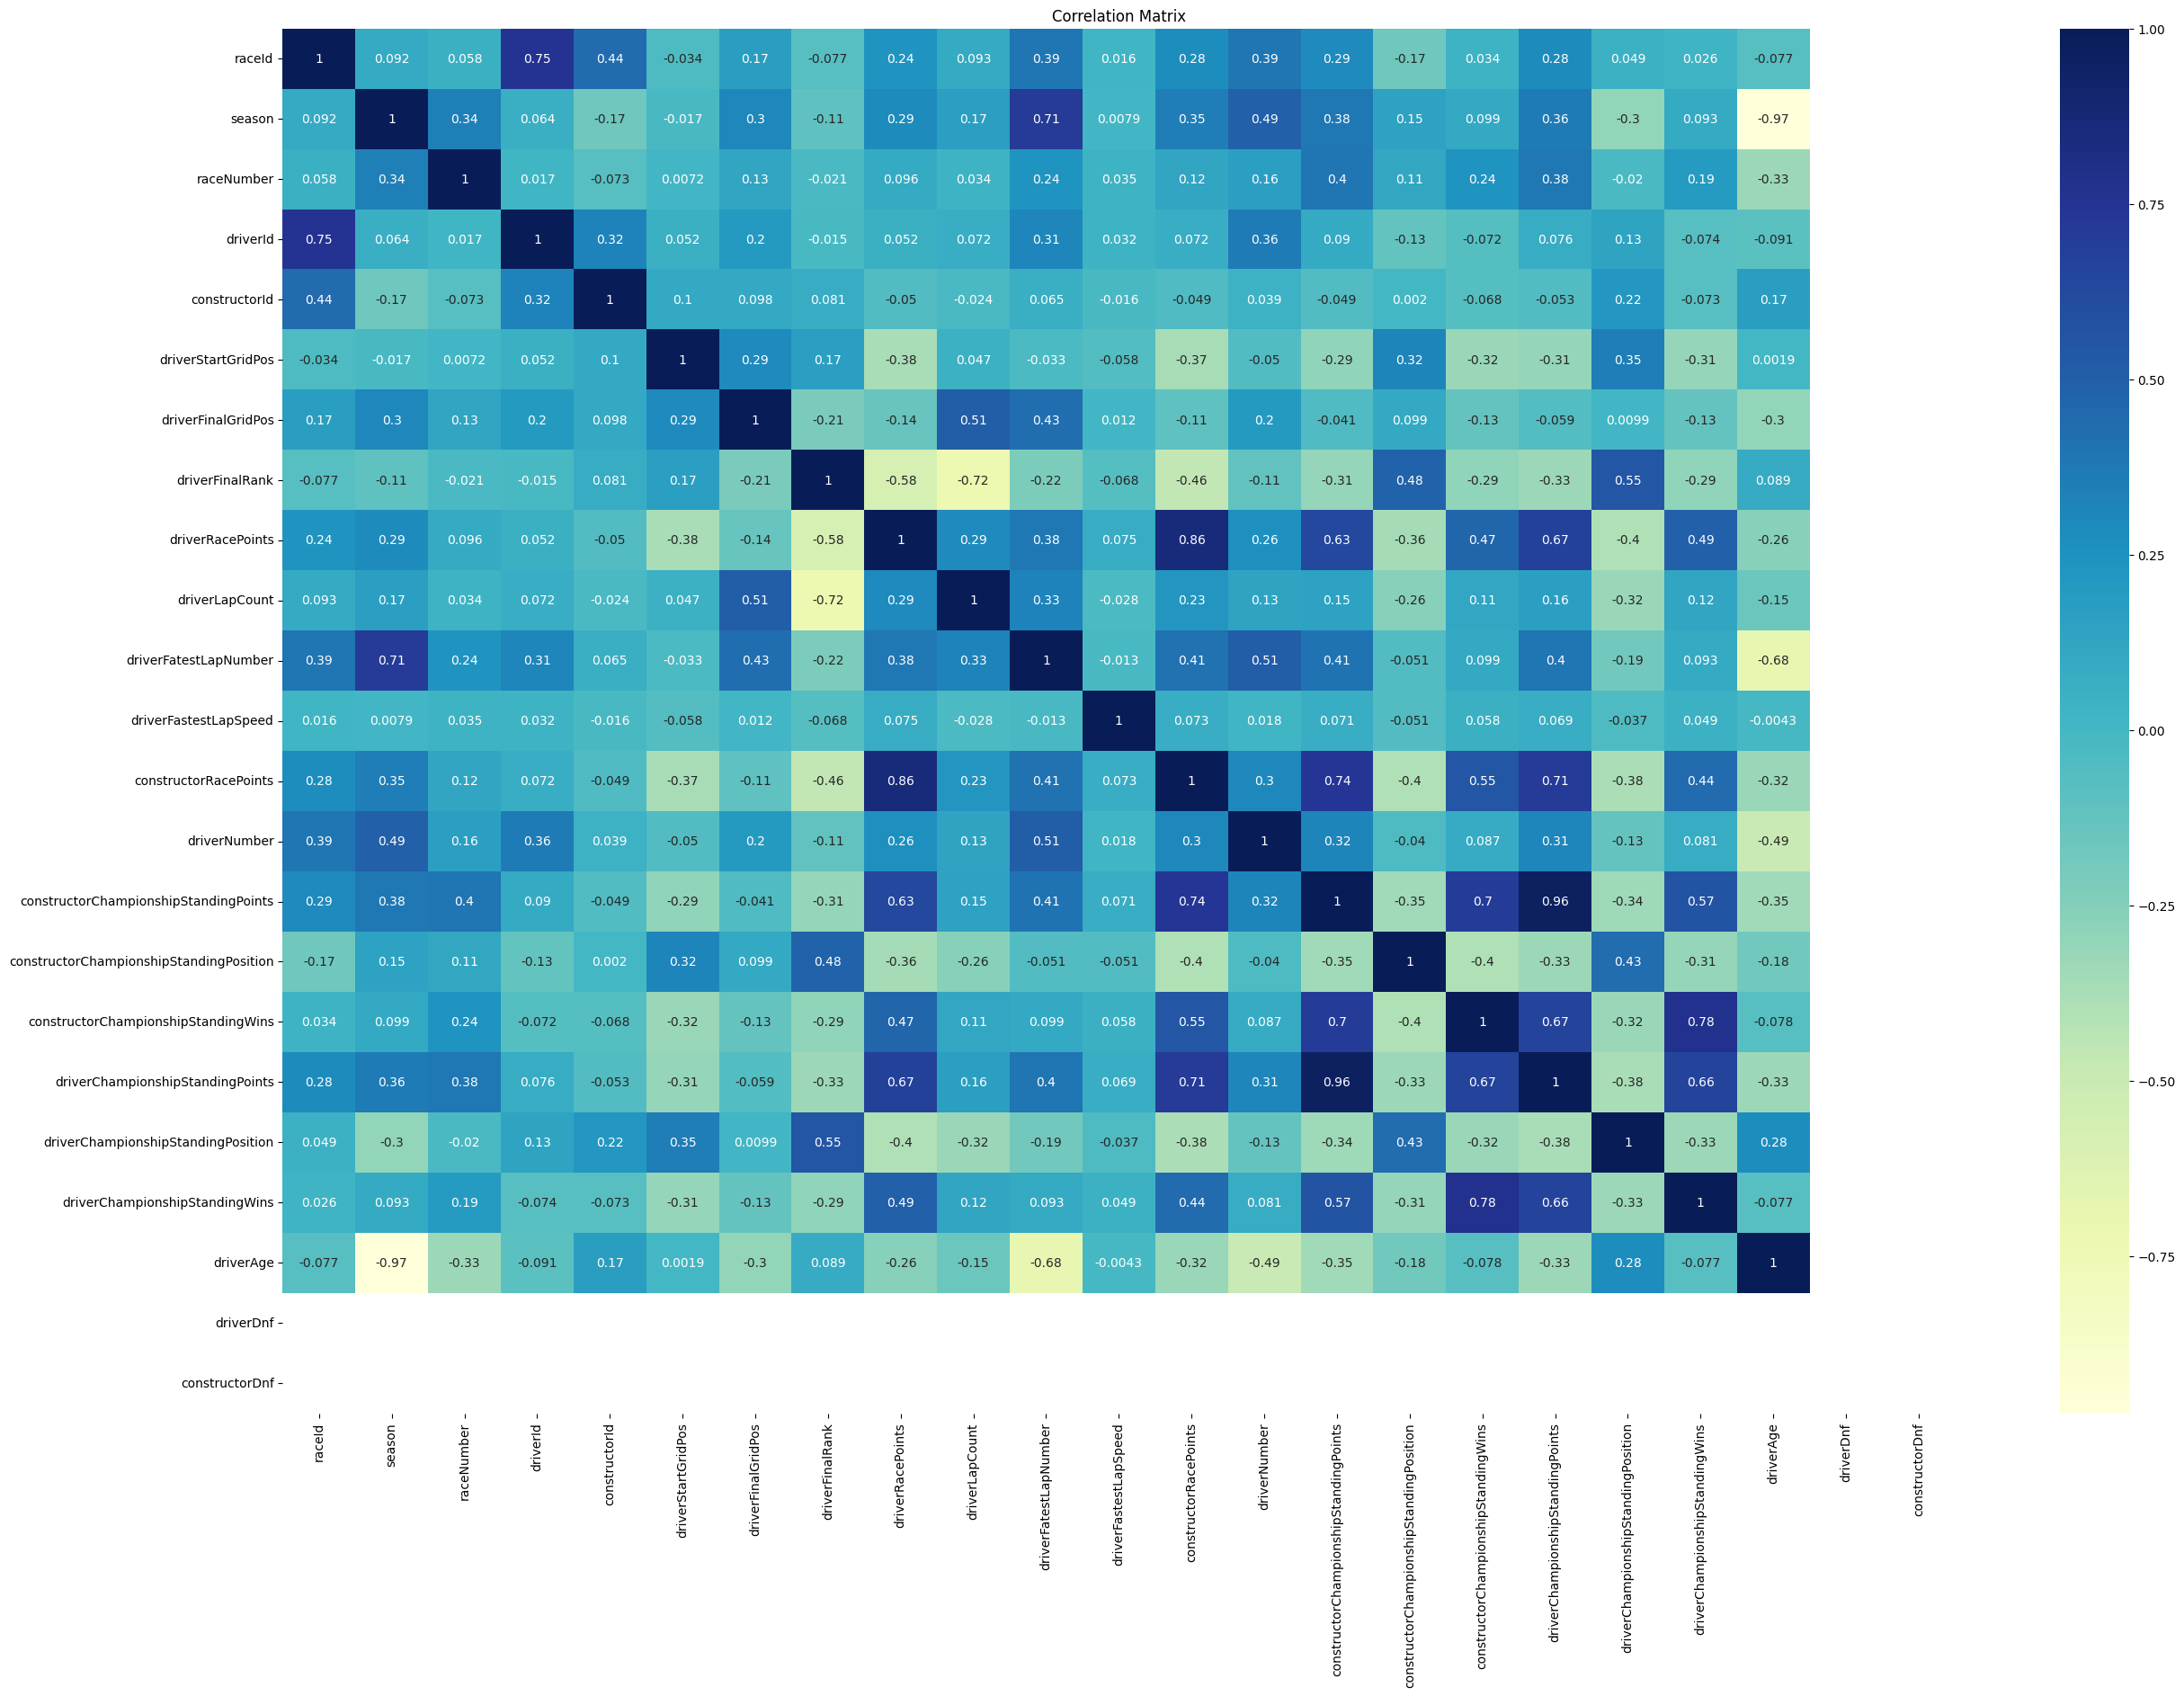

In [ ]:
# Visualize the correlation matrix using a heatmap
corr = result_v2.select_dtypes(include=np.number).corr()

fig, ax = plt.subplots(figsize=(30,20))
sns.heatmap(corr, annot=True, ax=ax, cmap="YlGnBu")

plt.title('Correlation Matrix')
plt.show()

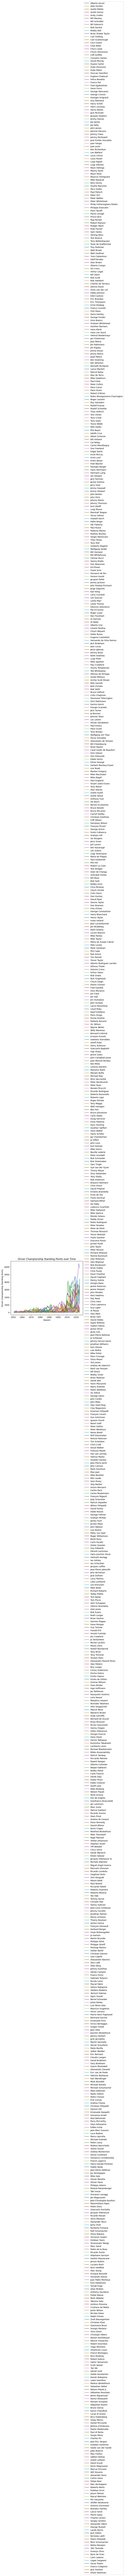

In [ ]:

driver_points = result_v2[result_v2.season > 1950]

#Group by season and driver name and sum the driver championship standing points
driver_points = driver_points.groupby(['season', 'driverName'])['driverChampionshipStandingPoints'].sum().reset_index()

fig, ax = plt.subplots()

#Iterate through each unique driver name in the driver_points dataframe
for driver in driver_points['driverName'].unique():
    driver_df = driver_points[driver_points['driverName'] == driver]
    ax.plot(driver_df['season'], driver_df['driverChampionshipStandingPoints'], label=driver)

#Set the plot title, x-axis label, and y-axis label
ax.set_title('Driver Championship Standing Points over Time')
ax.set_xlabel('Season')
ax.set_ylabel('Driver Championship Standing Points')
# The handles and labels are inferred from the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
df = result_v2
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [ ]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

In [ ]:
df_num = df.select_dtypes(include = ['float64', 'int64', 'int32'])
df_num.head()


raceId  season  raceNumber  driverId  constructorId  driverStartGridPos  \
0       1    2009           1        18             23                   1   
1       1    2009           1        22             23                   2   
2       1    2009           1        15              7                  20   
3       1    2009           1        10              7                  19   
4       1    2009           1         4              4                  10   

   driverFinalGridPos  driverFinalRank  driverRacePoints  driverLapCount  \
0                 1.0                1              10.0            58.0   
1                 2.0                2               8.0            58.0   
2                 3.0                3               6.0            58.0   
3                 4.0                4               5.0            58.0   
4                 5.0                5               4.0            58.0   

   driverFatestLapNumber  driverFastestLapSpeed  constructorRacePoints  \
0                   17.0                216.891                   18.0   
1                   43.0                214.344                   18.0   
2                   50.0                214.706                   11.0   
3                   53.0                215.920                   11.0   
4                   53.0                215.199                    4.0   

   driverNumber  constructorChampionshipStandingPoints  \
0          22.0                                   18.0   
1           0.0                                   18.0   
2           0.0                                   11.0   
3           0.0                                   11.0   
4          14.0                                    4.0   

   constructorChampionshipStandingPosition  \
0                                      1.0   
1                                      1.0   
2                                      2.0   
3                                      2.0   
4                                      3.0   

   constructorChampionshipStandingWins  driverChampionshipStandingPoints  \
0                                  1.0                              10.0   
1                                  1.0                               8.0   
2                                  0.0                               6.0   
3                                  0.0                               5.0   
4                                  0.0                               4.0   

   driverChampionshipStandingPosition  driverChampionshipStandingWins  \
0                                 1.0                             1.0   
1                                 2.0                             0.0   
2                                 3.0                             0.0   
3                                 4.0                             0.0   
4                                 5.0                             0.0   

   driverAge  driverDnf  constructorDnf  
0       45.0          0               1  
1       53.0          0               1  
2       51.0          0               1  
3       43.0          0               1  
4       44.0          0               1

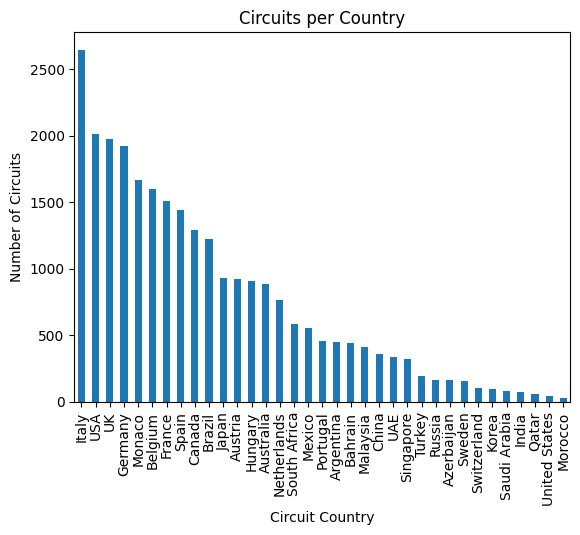

In [ ]:
# Create a bar chart of circuitCountry
df['circuitCountry'].value_counts().plot(kind='bar')

# Set x and y-axis labels
plt.xlabel('Circuit Country')
plt.ylabel('Number of Circuits')
# Set the title of the plot
plt.title('Circuits per Country')

# Show the plot
plt.show()

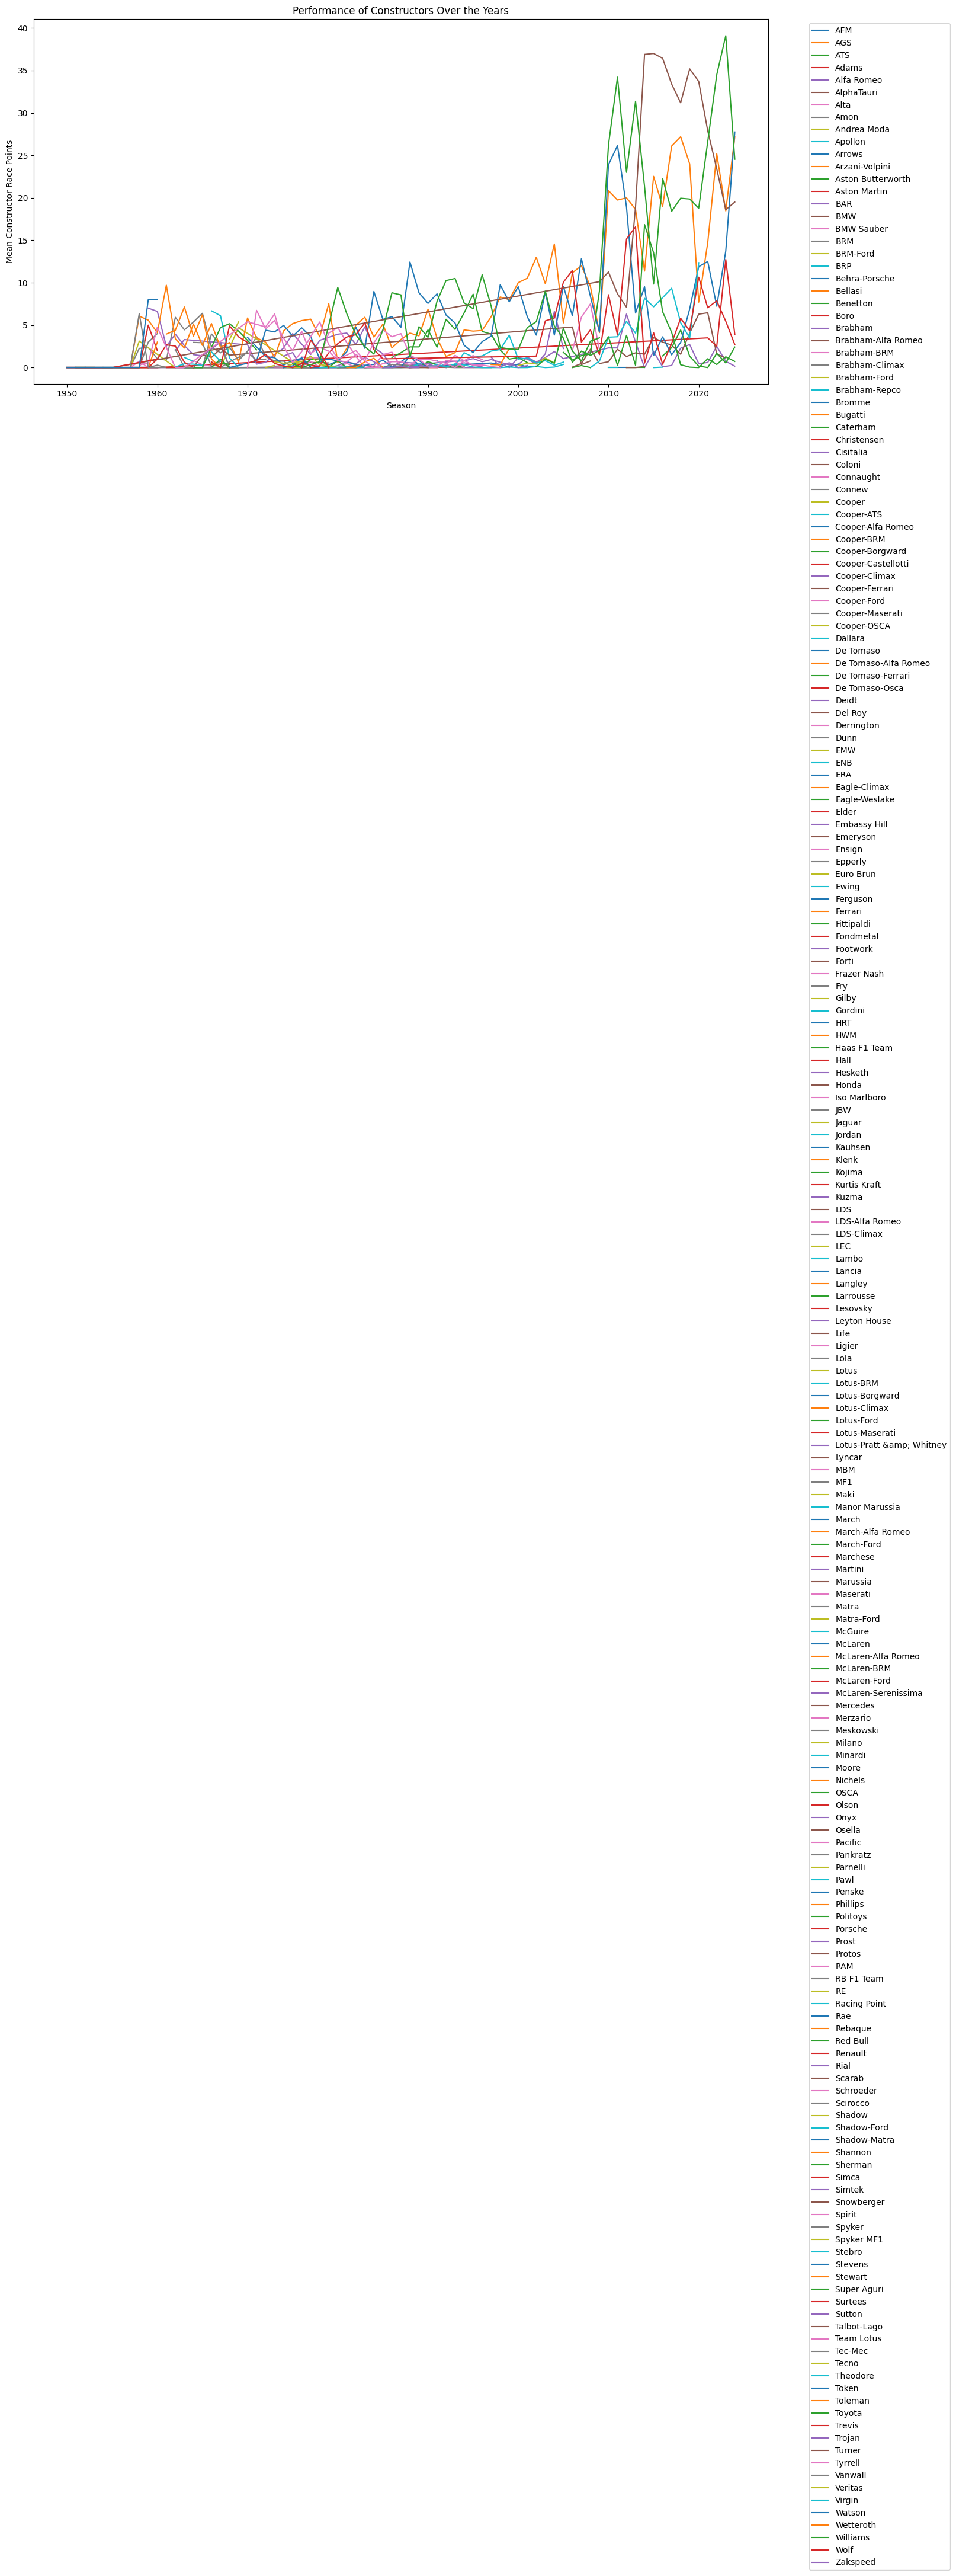

In [ ]:
df = result_v2

constructor_performance = df.groupby(['constructorName', 'season'])['constructorRacePoints'].mean().reset_index()

plt.figure(figsize=(16,8))
for constructor in constructor_performance['constructorName'].unique():
    constructor_data = constructor_performance[constructor_performance['constructorName']==constructor]
    plt.plot(constructor_data['season'], constructor_data['constructorRacePoints'], label=constructor)

plt.title('Performance of Constructors Over the Years')
plt.xlabel('Season')
plt.ylabel('Mean Constructor Race Points')

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()


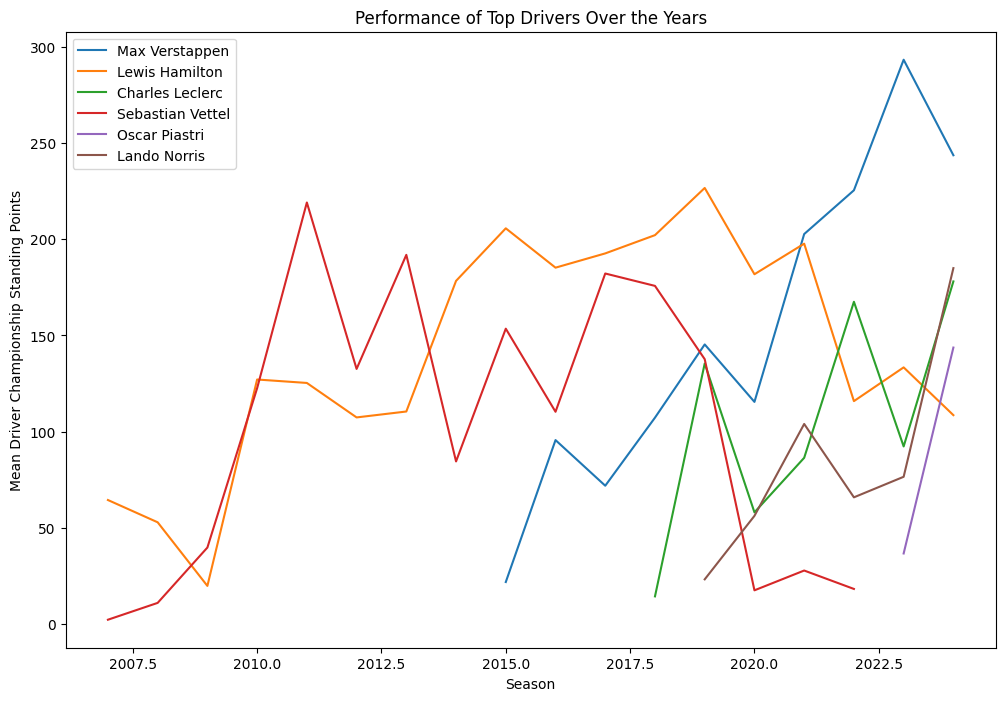

In [ ]:
df = result_v2

driver_performance = df.groupby(['driverName', 'season'])['driverChampionshipStandingPoints'].mean().reset_index()

# Get the top 5 drivers by mean driverChampionshipStandingPoints across all seasons
top_drivers = driver_performance.groupby('driverName')['driverChampionshipStandingPoints'].mean().sort_values(ascending=False)[:6].index

plt.figure(figsize=(12,8))
for driver in top_drivers:
    driver_data = driver_performance[driver_performance['driverName']==driver]
    plt.plot(driver_data['season'], driver_data['driverChampionshipStandingPoints'], label=driver)

plt.title('Performance of Top Drivers Over the Years')
plt.xlabel('Season')
plt.ylabel('Mean Driver Championship Standing Points')
plt.legend(loc='best')
plt.show()


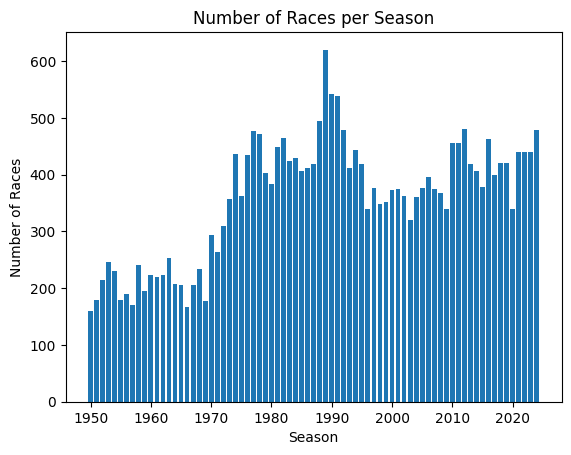

In [ ]:
df = result_v2
#Get the count of races by season and sort them by season
season_counts = df['season'].value_counts().sort_index()

plt.bar(season_counts.index, season_counts.values)
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.title('Number of Races per Season')
plt.show()

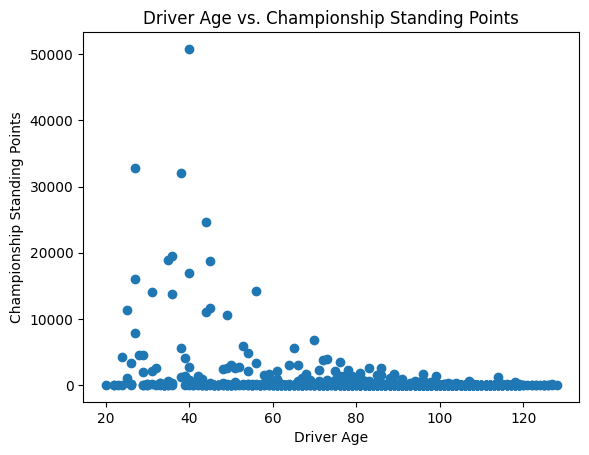

In [ ]:

#Grouping the data by driverId and taking the maximum driver age and sum of driver championship standing points
driver_age = df.groupby('driverId')['driverAge'].max()
driver_points = df.groupby('driverId')['driverChampionshipStandingPoints'].sum()
plt.scatter(driver_age, driver_points)
plt.xlabel('Driver Age')
plt.ylabel('Championship Standing Points')
plt.title('Driver Age vs. Championship Standing Points')
plt.show()

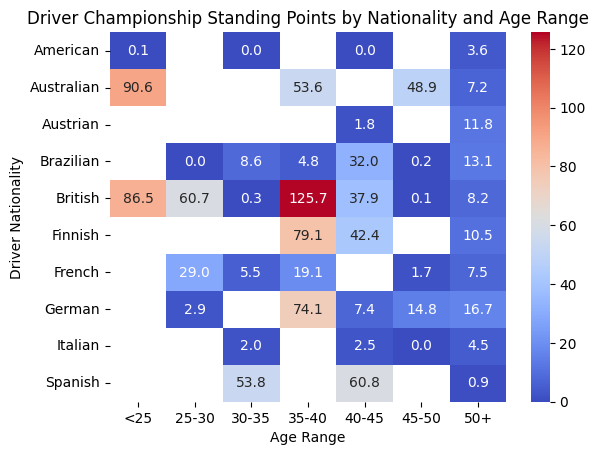

In [ ]:
#Creating bins and labels for age ranges
age_bins = [0, 25, 30, 35, 40, 45, 50, np.inf]
#Creating a new column 'age_range' based on the driver's age and the age bins
age_labels = ['<25', '25-30', '30-35', '35-40', '40-45', '45-50', '50+']
df['age_range'] = pd.cut(df['driverAge'], bins=age_bins, labels=age_labels)
driver_nationalities = df['driverNationality'].value_counts()[:10].index
#Create a pivot table to calculate mean driver championship standing points by nationality and age range
driver_championships = pd.pivot_table(df[df['driverNationality'].isin(driver_nationalities)], index='driverNationality', columns='age_range', values='driverChampionshipStandingPoints', aggfunc='mean')
sns.heatmap(driver_championships, cmap='coolwarm', annot=True, fmt='.1f')
plt.xlabel('Age Range')
plt.ylabel('Driver Nationality')
plt.title('Driver Championship Standing Points by Nationality and Age Range')
plt.show()